# Real Harmonic Oscillator Data

## Description

This exercise is about more advanced fitting of data, specifically **starting with a simple fit and building a more advanced one**.

The idea is to begin with the simplest possible function that even remotely does the job, which is then expanded to accommodate all the features present in the data fitted. The data is from three versions of a damped harmonic oscillator, consisting of a weight hanging from a spring, but with different damping:
- No additional damping.
- More damping from a round piece of cardboard, which increases the drag (most interesting dataset!).
- Damping from friction of the weight against metal.


## Functional form of a damped harmonic oscillator:

The function to fit the overall 1st and 2nd case with is known in physics as the damped harmonic oscillator, where position $p$ as a function of time $t$ behaves as:

$$p(t) = A \gamma \cdot\sin(\omega t+\phi) \cdot\exp(-\gamma t)$$

The 3rd case is a little different, as should become clear once plotted.


## Your task

Take a look at the various dataset, and try to fit them with an appropriate function. The first challenge is to get the fit working at all. Once this is in place, considering the patterns in the fit residuals should give you an idea of what to further include in the fit. Play around with various possible additions to the function, discussing with your peers. Remember to try to fit all three datasets.


##  Authors: 
- Troels Petersen ([email](mailto:petersen@nbi.dk))

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats

import matplotlib.gridspec as gridspec                          # For unequal plot boxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes    # For insert plots
import warnings
warnings.filterwarnings("ignore")

In [33]:
SavePlots = False
verbose = True
Nverbose = 10

---
## 1st Dataset - no additional damping

In [34]:
filename = "data_HarmOsc1.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time, position = np.loadtxt(filename, unpack=True)
time -= time[0]
eposition = np.ones_like(position)*0.0037        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time[i], position[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time), time[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time < -0.001) | (time > 100.0) | (position < -5.0) | (position > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time[i], position[i])

  Time =  0.000    Position = -0.683 
  Time =  0.010    Position = -0.694 
  Time =  0.020    Position = -0.702 
  Time =  0.030    Position = -0.699 
  Time =  0.040    Position = -0.702 
  Time =  0.050    Position = -0.691 
  Time =  0.060    Position = -0.684 
  Time =  0.070    Position = -0.669 
  Time =  0.080    Position = -0.644 
  Time =  0.090    Position = -0.609 
  Number of entries read: 3806    Time of last read: 38.050


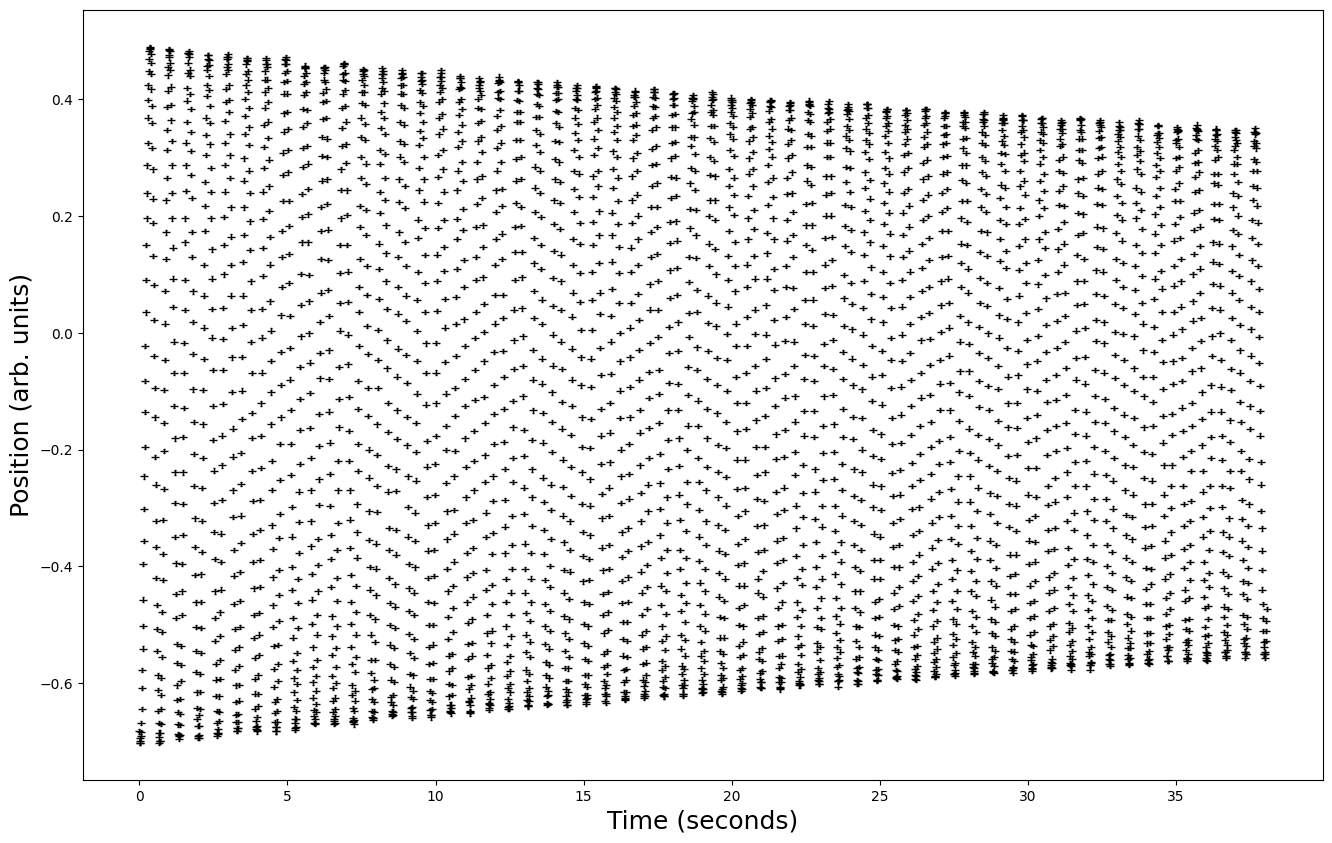

In [35]:
# Plot the data:
fig1, ax1 = plt.subplots(figsize=(16, 10))
# ax1 = fig1.add_axes((0.1, 0.3, 0.8, 0.6))    # Add the top subfigure
ax1.errorbar(time, position, eposition, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax1.set_xlabel("Time (seconds)", fontsize=18)
ax1.set_ylabel("Position (arb. units)", fontsize=18)
#ax1.set_ylim(top=ax1.get_ylim()[1]*2.5)
fig1.tight_layout;

Standard deviation of residuals: 0.0065


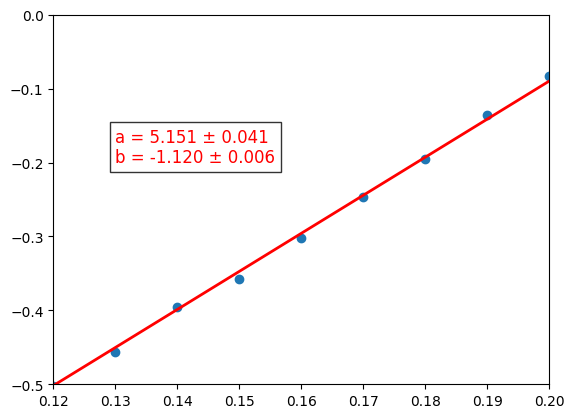

In [36]:
plt.plot(time, position, 'o')
plt.xlim(0.12,0.2)
plt.ylim(-0.5,0.0)
# fit line to this range

def func_line(x,a,b):
    return a*x + b

tmin = 0.1
tmax = 0.2

mask = (time >= tmin) & (time <= tmax)


cfit_line = cost.LeastSquares(time[mask], position[mask], eposition[mask], func_line)
mfit_line = Minuit(cfit_line, a=1.0, b=0.0)
mfit_line.migrad()


residuals = position[mask] - func_line(time[mask], *mfit_line.values[:])

std_res = np.std(residuals)
print(f"Standard deviation of residuals: {std_res:.4f}")

plt.plot(time, func_line(time, *mfit_line.values[:]), 'r', linewidth=2.0, label='Line fit')
plt.text(0.13, -0.2, f"a = {mfit_line.values['a']:.3f} ± {mfit_line.errors['a']:.3f}\nb = {mfit_line.values['b']:.3f} ± {mfit_line.errors['b']:.3f}", fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8)) 
plt.show()

In [102]:
# First fit function is a (initially too) simple harmonic oscillator:
def func_sho1(x, A, omega, phi, c) :
    return A * np.cos(omega*x + phi) + c

def func_exp_ho(x, A, omega, phi, c, tau) :
    return A * np.exp(-x/tau) * np.cos(omega*x + phi) + c

In [104]:
# Fit the data:
tmax = 38.0                              # Maximum of time range fitted
mask = time < tmax
cfit = cost.LeastSquares(time[mask], position[mask], eposition[mask], func_sho1)
initial_guess = {'A': 0.5, 'omega': 9.77, 'phi': 0.4, 'c': -0.1}
# initial_guess_exp = {'A': 0.5, 'omega': 9.77, 'phi': 0.4, 'c': -0.1, 'tau': 50.0}
mfit = Minuit(cfit, **initial_guess)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.527e+05 (χ²/ndof = 66.6) │              Nfcn = 154              │
│ EDM = 9.43e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 516.58e-3 │  0.08e-3  │            │            │         │         │       │
│ 1 │ omega │ 9.601843  │ 0.000015  │            │            │         │         │       │
│ 2 │ phi   │  2.81753  │  0.00032  │            │            │         │         │       │
│ 3 │ c     │-104.08e-3 │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        A    omega      phi        c │
├───────┼─────────────────────────────────────┤
│     A │  7.2e-09 -0.01e-9     0e-9     0e-9 │
│ omega │ -0.01e-9 2.25e-10 -4.08e-9  0.01e-9 │
│   phi │     0e-9 -4.08e-9 1.01e-07    -0e-9 │
│     c │     0e-9  0.01e-9    -0e-9  3.6e-09 │
└───────┴─────────────────────────────────────┘

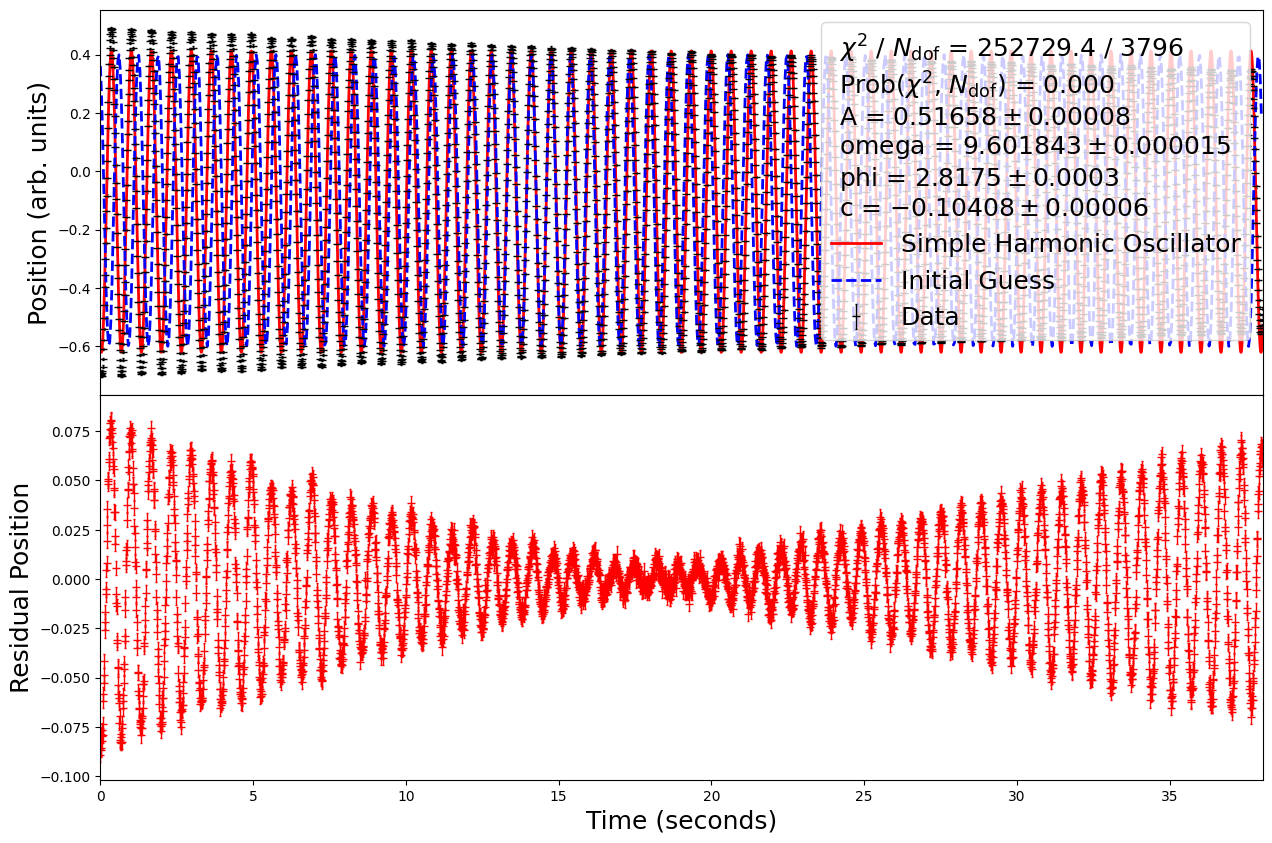

In [105]:
chi2 = mfit.fval
ndof = len(time[mask])-len(mfit.values[:])
prob = stats.chi2.sf(chi2, ndof)

# Calculate residuals:
res_position = position - func_sho1(time, *mfit.values[:])

# Plot with common x-axis:
fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0)       # Remove vertical space between Axes

# Main plot with fit on top:
axs[0].errorbar(time, position, eposition, fmt='k_', label='Data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
axs[0].set_ylabel("Position (arb. units)", fontsize=18)
axs[0].set_xlim(time[0], time[-1])

# Draw the function on top of the data:
x_fit = np.linspace(0, tmax, 1000)
y_fit = func_sho1(x_fit, *mfit.values[:])
axs[0].plot(time, func_sho1(time, *mfit.values[:]), 'r', linewidth=2.0, label='Simple Harmonic Oscillator')

# draw initial guess
y_init = func_sho1(x_fit, **initial_guess)
axs[0].plot(x_fit, y_init, 'b--', linewidth=2.0, label='Initial Guess') 


# Put fit info into plot:
fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob:.3f}",]
for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    fit_info.append(f"{p} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$")
axs[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18, alignment = 'center', loc='upper right');

# Residual plot:
axs[1].errorbar(time, res_position, eposition, fmt='r_', label='Residuals', ecolor='r', elinewidth=1, capsize=1, capthick=1)
axs[1].set_xlabel("Time (seconds)", fontsize=18)
axs[1].set_ylabel("Residual Position", fontsize=18)

# Finalize the figure
if (SavePlots) :
    fig.savefig("Fit_HarmOsc1.pdf", dpi=600)

In [106]:
# Fit the data:
tmax = 38.0                              # Maximum of time range fitted
mask = time < tmax
cfit = cost.LeastSquares(time[mask], position[mask], eposition[mask], func_exp_ho)
initial_guess = {'A': 0.5, 'omega': 9.77, 'phi': 0.4, 'c': -0.1, 'tau': 50.0}
# initial_guess_exp = {'A': 0.5, 'omega': 9.77, 'phi': 0.4, 'c': -0.1, 'tau': 50.0}
mfit = Minuit(cfit, **initial_guess)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7063 (χ²/ndof = 1.9)       │              Nfcn = 225              │
│ EDM = 7.39e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 592.81e-3 │  0.18e-3  │            │            │         │         │       │
│ 1 │ omega │ 9.601788  │ 0.000015  │            │            │         │         │       │
│ 2 │ phi   │  2.81884  │  0.00031  │            │            │         │         │       │
│ 3 │ c     │-104.02e-3 │  0.06e-3  │            │            │         │         │       │
│ 4 │ tau   │  134.64   │   0.27    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │          A      omega        phi          c        tau │
├───────┼────────────────────────────────────────────────────────┤
│     A │   3.29e-08   -0.02e-9   0.001e-6       0e-9 -41.829e-6 │
│ omega │   -0.02e-9   2.27e-10   -3.91e-9    0.01e-9   33.14e-9 │
│   phi │   0.001e-6   -3.91e-9   9.42e-08      -0e-9   -0.75e-6 │
│     c │       0e-9    0.01e-9      -0e-9    3.6e-09     -33e-9 │
│   tau │ -41.829e-6   33.14e-9   -0.75e-6     -33e-9     0.0744 │
└───────┴────────────────────────────────────────────────────────┘

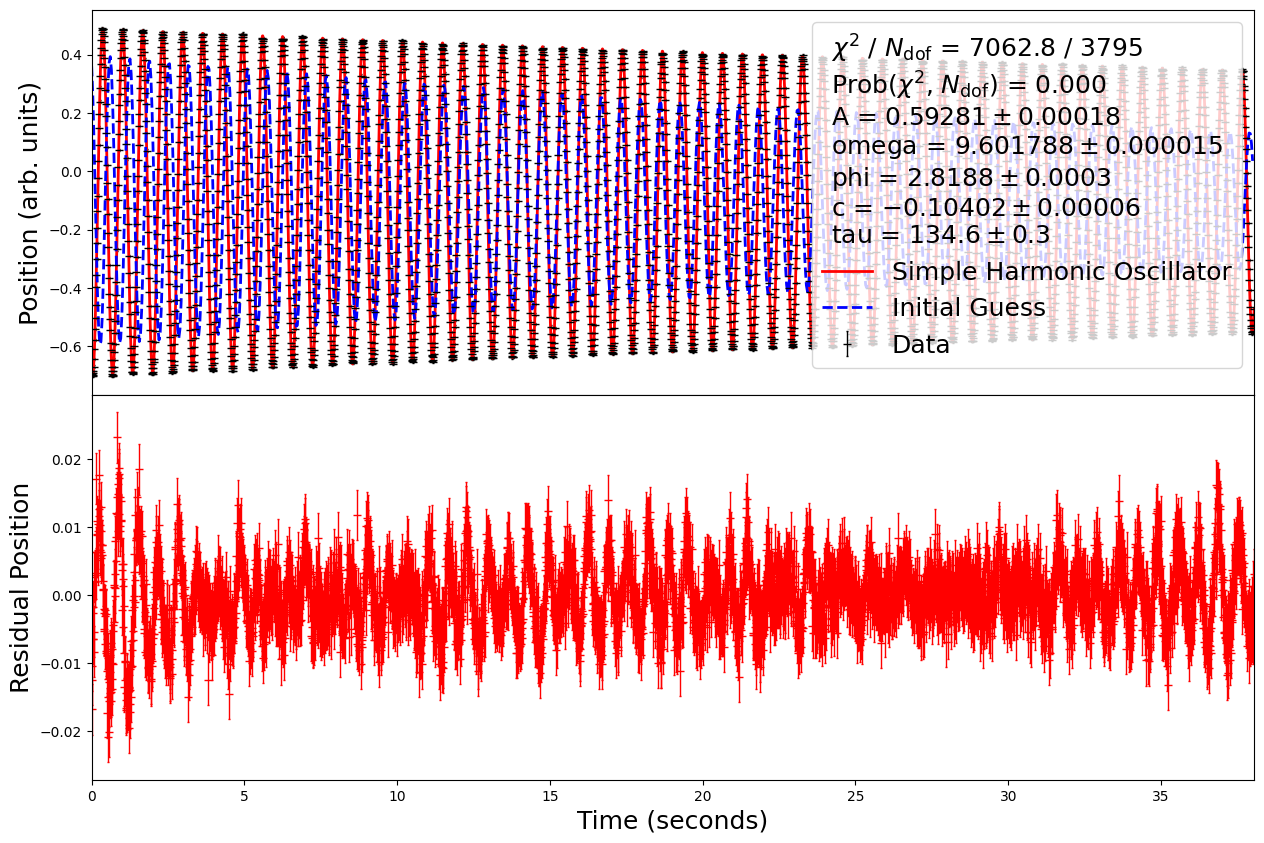

In [108]:
chi2 = mfit.fval
ndof = len(time[mask])-len(mfit.values[:])
prob = stats.chi2.sf(chi2, ndof)

# Calculate residuals:
res_position = position - func_exp_ho(time, *mfit.values[:])

# Plot with common x-axis:
fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0)       # Remove vertical space between Axes

# Main plot with fit on top:
axs[0].errorbar(time, position, eposition, fmt='k_', label='Data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
axs[0].set_ylabel("Position (arb. units)", fontsize=18)
axs[0].set_xlim(time[0], time[-1])

# Draw the function on top of the data:
x_fit = np.linspace(0, tmax, 1000)
y_fit = func_exp_ho(x_fit, *mfit.values[:])
axs[0].plot(time, func_exp_ho(time, *mfit.values[:]), 'r', linewidth=2.0, label='Simple Harmonic Oscillator')

# draw initial guess
y_init = func_exp_ho(x_fit, **initial_guess)
axs[0].plot(x_fit, y_init, 'b--', linewidth=2.0, label='Initial Guess') 


# Put fit info into plot:
fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob:.3f}",]
for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    fit_info.append(f"{p} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$")
axs[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18, alignment = 'center', loc='upper right');

# Residual plot:
axs[1].errorbar(time, res_position, eposition, fmt='r_', label='Residuals', ecolor='r', elinewidth=1, capsize=1, capthick=1)
axs[1].set_xlabel("Time (seconds)", fontsize=18)
axs[1].set_ylabel("Residual Position", fontsize=18)

# Finalize the figure
if (SavePlots) :
    fig.savefig("Fit_HarmOsc1.pdf", dpi=600)

For model 1: chi is 252729.4/3796



## Questions to 1st dataset:

1. Look at the data file and plot and see if you can by eye (or simple fits) estimate
   the size of the uncertainty of the points. It is not easy, but you should be able
   to get it to within a factor of 2-3. Discuss it with your neighbor/group, and try
   to come up with an estimate.
***
_5-10 minutes (success or failure) later_...
***

   If you didn't know how to estimate this uncertainty, then try to zoom in on a very
   small part of the curve (say xy: [0.1,0.3] x [-0.6,0.4]) in a large (e.g. 15x20) plot,
   where it should be possible to fit it with a line.
   Since you know that for a small enough range of the data, this will be a reasonable
   model to use, you can extract the error from the Std. of the residuals, which gives you
   a rough estimate of the errors on the points (remember the pendulum timing!).
   Compare the error you got to the one I put in.

2. Once you have tried, set the error to 0.0037, and try to make the harmonic oscillator
   fit converge. Do you manage? If not, do you understand what the problem is?
***
_10-15 minutes (success or failure) later_...
***

3. Did the fit converge? I imagine that it didn't thought it might have. If it didn't, my
   guess on why would be initial parameters, which need to be set quite accurately in this case.
   Try to draw the fit function on top of the data, and adjust the parameters until it does.
***
_10-15 minutes (success or failure) later_...
***

4. Once you have a functioning harmonic oscillator fit running, then the fit
   will probably look reasonable. Don't worry too much about the ChiSquare value - it is hard to
   know the uncertainty anyway, and there may be a myriad of effects in the data.
   However, the residuals still clearly have a lot of structure, which are thus features not
   included/accounted for in the fit. So you should try to add complexity to your fitting function.

   The way to judge, if you are doing something right is to see if the ChiSquare (and the residuals)
   reduce every time you introduce something in addition. The ChiSquare should decrease "significantly"
   (*) every time, otherwise, the addition does not cover any corresponding effect in the data, but
   simply statistical variations.

(*) Remember, that a reduction in ChiSquare of say 9 correponds to a $\sqrt{9} = 3$ sigma effect,
and thus this is the order of magnitude, it should decrease (a matter of judgement and how reasonable
the effect introduced is).

As inspiration to the more advanced fit, I could ask:
 - How to include the slight but clearly visible damping in the fit?
 - Are the period (omega) and/or phase (phi) constant?
 - Are there more than one exponential/oscillation in the system?

---

## 2nd Dataset

This dataset was acquired with the help of an overdamped oscillator (a cardboard panel was added to the weight, thereby increasing the atospheric drag of the system). This not only increases the damping, but also increases the complexity a bit.

In [109]:
filename = "data_HarmOsc2.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time2, position2 = np.loadtxt(filename, unpack=True)
time2 -= time2[0]
eposition2 = np.ones_like(position2)*0.0029        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time2[i], position2[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time2), time2[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time2 < -0.001) | (time2 > 100.0) | (position2 < -5.0) | (position2 > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time2[i], position2[i])

  Time =  0.000    Position =  0.179 
  Time =  0.010    Position =  0.182 
  Time =  0.020    Position =  0.198 
  Time =  0.030    Position =  0.207 
  Time =  0.040    Position =  0.217 
  Time =  0.050    Position =  0.229 
  Time =  0.060    Position =  0.238 
  Time =  0.070    Position =  0.240 
  Time =  0.080    Position =  0.247 
  Time =  0.090    Position =  0.251 
  Number of entries read: 3616    Time of last read: 36.150


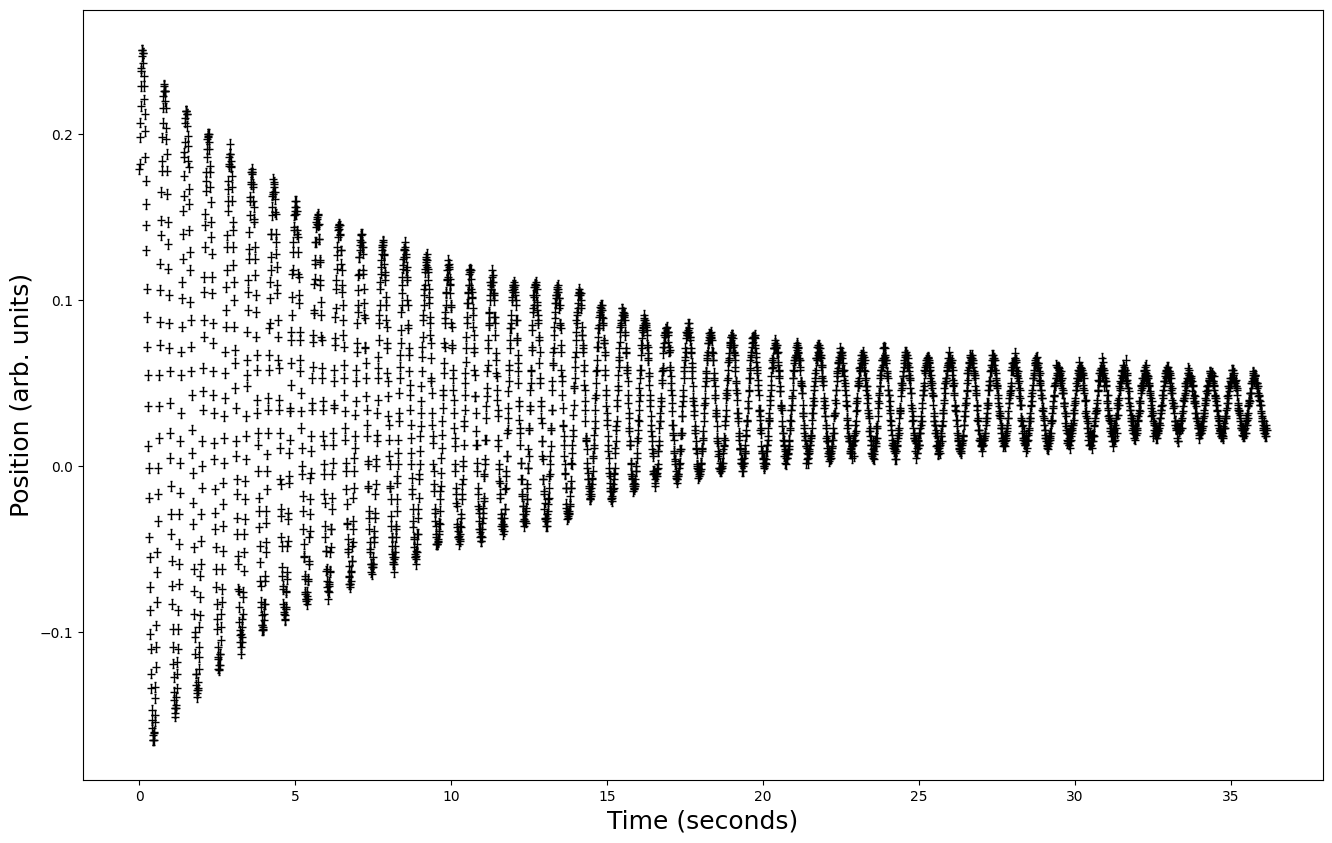

In [110]:
# Plot the data:
fig2, ax2 = plt.subplots(figsize=(16, 10))
ax2.errorbar(time2, position2, eposition2, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.set_xlabel("Time (seconds)", fontsize=18)
ax2.set_ylabel("Position (arb. units)", fontsize=18)
fig2.tight_layout;

In [119]:
# Fit the data:
tmax = 36.0                              # Maximum of time range fitted
mask = time2 < tmax
cfit = cost.LeastSquares(time2[mask], position2[mask], eposition2[mask], func_exp_ho)
initial_guess = {'A': 0.1958, 'omega': 8.98, 'phi': -0.99, 'c': 0.038, 'tau': 12.0}
# initial_guess_exp = {'A': 0.5, 'omega': 9.77, 'phi': 0.4, 'c': -0.1, 'tau': 50.0}
mfit = Minuit(cfit, **initial_guess)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.07e+04 (χ²/ndof = 3.0)   │              Nfcn = 125              │
│ EDM = 1.51e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 195.80e-3 │  0.24e-3  │            │            │         │         │       │
│ 1 │ omega │  8.98148  │  0.00014  │            │            │         │         │       │
│ 2 │ phi   │  -0.9947  │  0.0012   │            │            │         │         │       │
│ 3 │ c     │ 37.66e-3  │  0.05e-3  │            │            │         │         │       │
│ 4 │ tau   │  12.180   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         A     omega       phi         c       tau │
├───────┼───────────────────────────────────────────────────┤
│     A │  5.88e-08 -0.001e-6   0.01e-6   -0.1e-9  -4.00e-6 │
│ omega │ -0.001e-6  2.02e-08 -0.122e-6        -0  0.195e-6 │
│   phi │   0.01e-6 -0.122e-6  1.46e-06    0.4e-9   -1.1e-6 │
│     c │   -0.1e-9        -0    0.4e-9  2.34e-09    7.5e-9 │
│   tau │  -4.00e-6  0.195e-6   -1.1e-6    7.5e-9  0.000511 │
└───────┴───────────────────────────────────────────────────┘

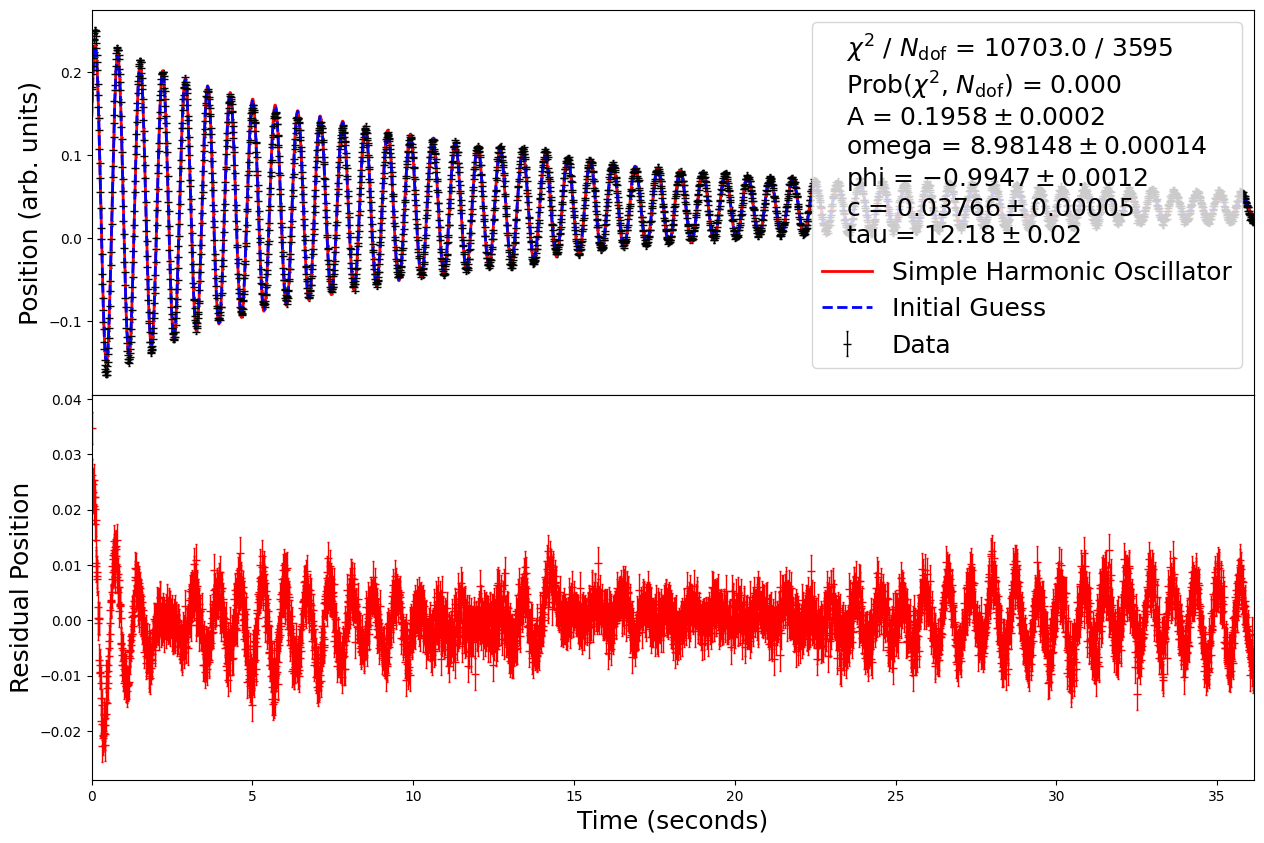

In [120]:
chi2 = mfit.fval
ndof = len(time2[mask])-len(mfit.values[:])
prob = stats.chi2.sf(chi2, ndof)

# Calculate residuals:
res_position = position2 - func_exp_ho(time2, *mfit.values[:])

# Plot with common x-axis:
fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0)       # Remove vertical space between Axes

# Main plot with fit on top:
axs[0].errorbar(time2, position2, eposition2, fmt='k_', label='Data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
axs[0].set_ylabel("Position (arb. units)", fontsize=18)
axs[0].set_xlim(time2[0], time2[-1])

# Draw the function on top of the data:
x_fit = np.linspace(0, tmax, 1000)
y_fit = func_exp_ho(x_fit, *mfit.values[:])
axs[0].plot(time2, func_exp_ho(time2, *mfit.values[:]), 'r', linewidth=2.0, label='Simple Harmonic Oscillator')

# draw initial guess
y_init = func_exp_ho(x_fit, **initial_guess)
axs[0].plot(x_fit, y_init, 'b--', linewidth=2.0, label='Initial Guess') 


# Put fit info into plot:
fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob:.3f}",]
for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    fit_info.append(f"{p} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$")
axs[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18, alignment = 'center', loc='upper right');

# Residual plot:
axs[1].errorbar(time2, res_position, eposition2, fmt='r_', label='Residuals', ecolor='r', elinewidth=1, capsize=1, capthick=1)
axs[1].set_xlabel("Time (seconds)", fontsize=18)
axs[1].set_ylabel("Residual Position", fontsize=18)

# Finalize the figure
if (SavePlots) :
    fig.savefig("Fit_HarmOsc1.pdf", dpi=600)

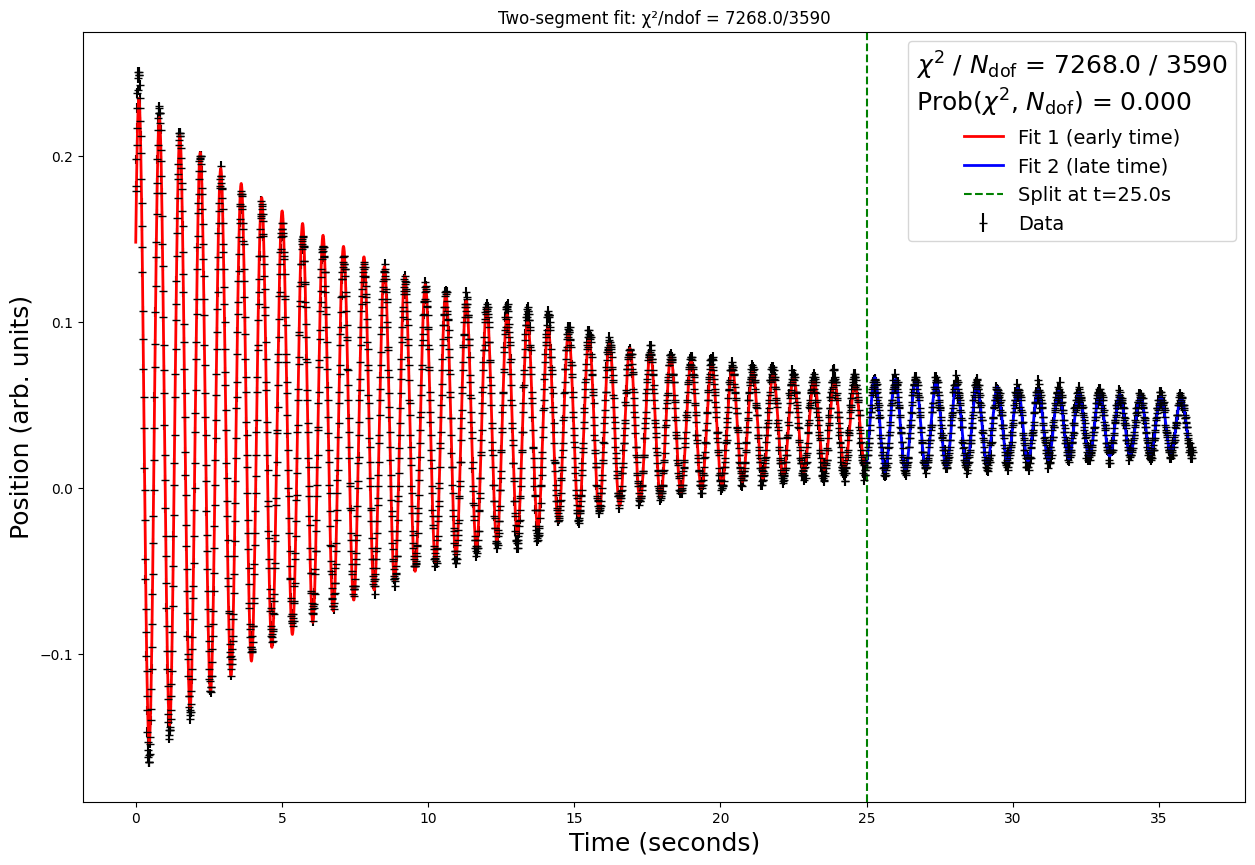

Total chi-square: 7268.0
Chi-square segment 1: 6390.8
Chi-square segment 2: 877.2


In [130]:
# Split the fit into two time regions
t_split = 25.0  # Adjust this value based on where you see the behavior change

# First segment
mask1 = (time2 < t_split)
cfit1 = cost.LeastSquares(time2[mask1], position2[mask1], eposition2[mask1], func_exp_ho)
initial_guess1 = {'A': 0.1958, 'omega': 8.98, 'phi': -0.99, 'c': 0.038, 'tau': 12.0}
mfit1 = Minuit(cfit1, **initial_guess1)
mfit1.migrad()

# Second segment
mask2 = (time2 >= t_split) & (time2 < 36.0)
cfit2 = cost.LeastSquares(time2[mask2], position2[mask2], eposition2[mask2], func_exp_ho)
# Use results from first fit as initial guess for second fit
initial_guess2 = {'A': 0.1, 'omega': 8.98, 'phi': -0.99, 'c': 0.038, 'tau': 15.0}
mfit2 = Minuit(cfit2, **initial_guess2)
mfit2.migrad()

# Calculate total chi-square
chi2_total = mfit1.fval + mfit2.fval
ndof_total = (len(time2[mask1]) + len(time2[mask2])) - 2*len(mfit1.values[:])  # 2 fits worth of parameters

# Plot both fits
x_fit1 = time2[mask1]
y_fit1 = func_exp_ho(x_fit1, *mfit1.values[:])

x_fit2 = time2[mask2]
y_fit2 = func_exp_ho(x_fit2, *mfit2.values[:])

# Put fit info into plot:
fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2_total:.1f} / {ndof_total}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob_total:.3f}",]
# for p, v, e in zip(mfit1.parameters, mfit1.values[:], mfit1.errors[:]) :
#     Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
#     fit_info.append(f"{p} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$")

plt.figure(figsize=(15, 10))
plt.errorbar(time2, position2, eposition2, fmt='k_', label='Data')
plt.plot(x_fit1, y_fit1, 'r-', linewidth=2, label='Fit 1 (early time)')
plt.plot(x_fit2, y_fit2, 'b-', linewidth=2, label='Fit 2 (late time)')
plt.axvline(t_split, color='g', linestyle='--', label=f'Split at t={t_split}s')
plt.xlabel("Time (seconds)", fontsize=18)
plt.ylabel("Position (arb. units)", fontsize=18)
plt.legend(title="\n".join(fit_info), fontsize=14, title_fontsize=18, alignment = 'center', loc='upper right');

plt.title(f"Two-segment fit: χ²/ndof = {chi2_total:.1f}/{ndof_total}")
plt.show()

print(f"Total chi-square: {chi2_total:.1f}")
print(f"Chi-square segment 1: {mfit1.fval:.1f}")
print(f"Chi-square segment 2: {mfit2.fval:.1f}")

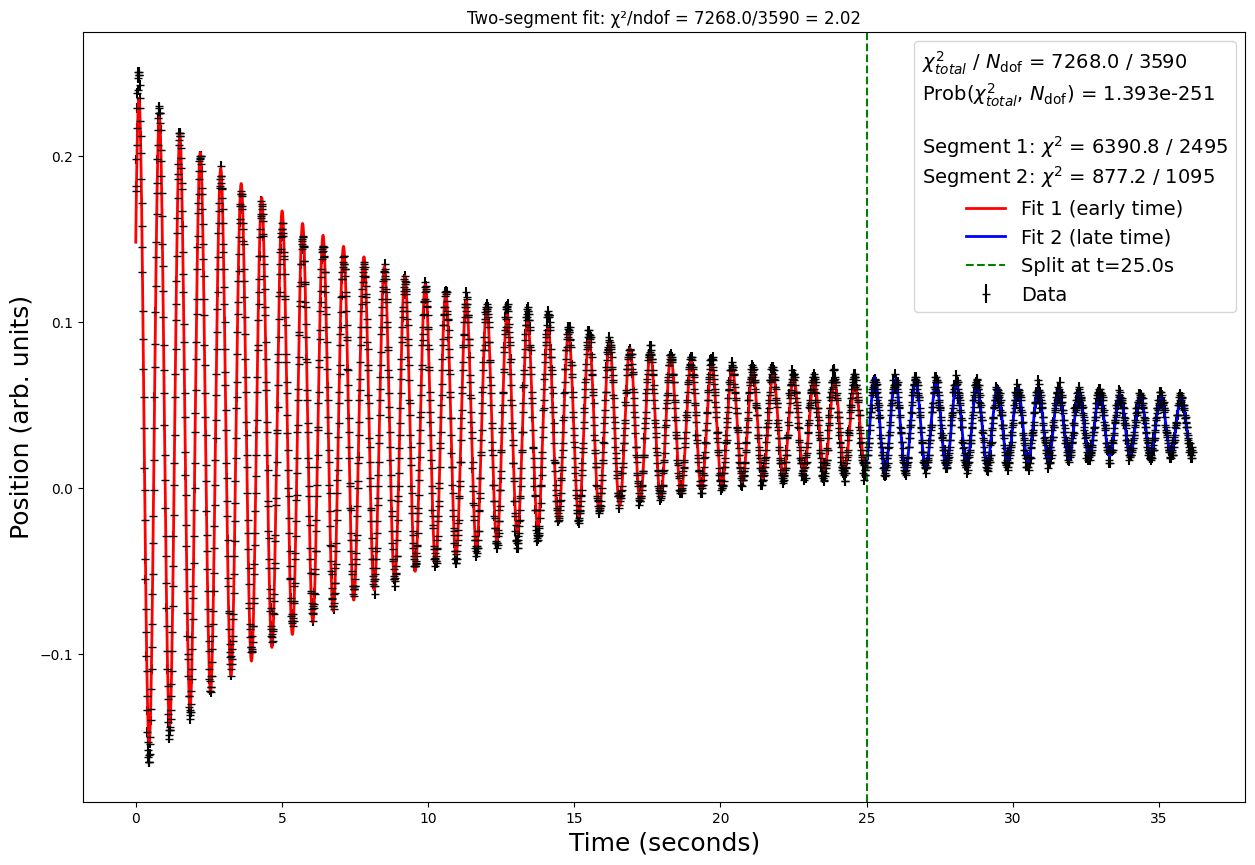


TWO-SEGMENT FIT RESULTS (split at t=25.0s)
Segment 1 [0, 25.0s]:
  χ² = 6390.8, ndof = 2495, χ²/ndof = 2.561
  p-value = 0.0000e+00

Segment 2 [25.0, 36.0s]:
  χ² = 877.2, ndof = 1095, χ²/ndof = 0.801
  p-value = 1.0000e+00

Combined:
  χ²_total = 7268.0, ndof_total = 3590, χ²/ndof = 2.025
  p-value = 1.3930e-251


In [125]:
# Split the fit into two time regions
t_split = 25.0  # Adjust this value based on where you see the behavior change

# First segment
mask1 = (time2 < t_split)
cfit1 = cost.LeastSquares(time2[mask1], position2[mask1], eposition2[mask1], func_exp_ho)
initial_guess1 = {'A': 0.1958, 'omega': 8.98, 'phi': -0.99, 'c': 0.038, 'tau': 12.0}
mfit1 = Minuit(cfit1, **initial_guess1)
mfit1.migrad()

# Second segment
mask2 = (time2 >= t_split) & (time2 < 36.0)
cfit2 = cost.LeastSquares(time2[mask2], position2[mask2], eposition2[mask2], func_exp_ho)
# Use results from first fit as initial guess for second fit
initial_guess2 = {'A': 0.1, 'omega': 8.98, 'phi': -0.99, 'c': 0.038, 'tau': 15.0}
mfit2 = Minuit(cfit2, **initial_guess2)
mfit2.migrad()

# Calculate chi-square and ndof for each segment
chi2_1 = mfit1.fval
ndof_1 = len(time2[mask1]) - len(mfit1.values[:])
prob_1 = stats.chi2.sf(chi2_1, ndof_1)

chi2_2 = mfit2.fval
ndof_2 = len(time2[mask2]) - len(mfit2.values[:])
prob_2 = stats.chi2.sf(chi2_2, ndof_2)

# Calculate total chi-square
chi2_total = chi2_1 + chi2_2
ndof_total = ndof_1 + ndof_2
prob_total = stats.chi2.sf(chi2_total, ndof_total)

# Plot both fits
x_fit1 = time2[mask1]
y_fit1 = func_exp_ho(x_fit1, *mfit1.values[:])

x_fit2 = time2[mask2]
y_fit2 = func_exp_ho(x_fit2, *mfit2.values[:])

# Put fit info into plot with both segments:
fit_info = [
    f"$\\chi^2_{{total}}$ / $N_\\mathrm{{dof}}$ = {chi2_total:.1f} / {ndof_total}",
    f"Prob($\\chi^2_{{total}}$, $N_\\mathrm{{dof}}$) = {prob_total:.3e}",
    "",
    f"Segment 1: $\\chi^2$ = {chi2_1:.1f} / {ndof_1}",
    f"Segment 2: $\\chi^2$ = {chi2_2:.1f} / {ndof_2}"
]

plt.figure(figsize=(15, 10))
plt.errorbar(time2, position2, eposition2, fmt='k_', label='Data')
plt.plot(x_fit1, y_fit1, 'r-', linewidth=2, label='Fit 1 (early time)')
plt.plot(x_fit2, y_fit2, 'b-', linewidth=2, label='Fit 2 (late time)')
plt.axvline(t_split, color='g', linestyle='--', label=f'Split at t={t_split}s')
plt.xlabel("Time (seconds)", fontsize=18)
plt.ylabel("Position (arb. units)", fontsize=18)
plt.legend(title="\n".join(fit_info), fontsize=14, title_fontsize=14, alignment='center', loc='upper right')

plt.title(f"Two-segment fit: χ²/ndof = {chi2_total:.1f}/{ndof_total} = {chi2_total/ndof_total:.2f}")
plt.show()

print(f"\n{'='*60}")
print(f"TWO-SEGMENT FIT RESULTS (split at t={t_split}s)")
print(f"{'='*60}")
print(f"Segment 1 [0, {t_split}s]:")
print(f"  χ² = {chi2_1:.1f}, ndof = {ndof_1}, χ²/ndof = {chi2_1/ndof_1:.3f}")
print(f"  p-value = {prob_1:.4e}")
print(f"\nSegment 2 [{t_split}, 36.0s]:")
print(f"  χ² = {chi2_2:.1f}, ndof = {ndof_2}, χ²/ndof = {chi2_2/ndof_2:.3f}")
print(f"  p-value = {prob_2:.4e}")
print(f"\nCombined:")
print(f"  χ²_total = {chi2_total:.1f}, ndof_total = {ndof_total}, χ²/ndof = {chi2_total/ndof_total:.3f}")
print(f"  p-value = {prob_total:.4e}")
print(f"{'='*60}")


Fitting with 1 segment(s)
Total: χ²/ndof = 10703.0/3595 = 2.977
p-value = 0.0000e+00

Fitting with 2 segment(s)
  Segment 1: t=[0.0, 18.0], χ² = 4955.2 / 1795
  Segment 2: t=[18.0, 36.0], χ² = 1461.5 / 1795
Total: χ²/ndof = 6416.7/3590 = 1.787
p-value = 9.8730e-164

Fitting with 3 segment(s)
  Segment 1: t=[0.0, 12.0], χ² = 2819.2 / 1195
  Segment 2: t=[12.0, 24.0], χ² = 1240.7 / 1195
  Segment 3: t=[24.0, 36.0], χ² = 962.5 / 1195
Total: χ²/ndof = 5022.4/3585 = 1.401
p-value = 5.0393e-52

Fitting with 5 segment(s)
  Segment 1: t=[0.0, 7.2], χ² = 926.4 / 715
  Segment 2: t=[7.2, 14.4], χ² = 739.8 / 715
  Segment 3: t=[14.4, 21.6], χ² = 423.2 / 715
  Segment 4: t=[21.6, 28.8], χ² = 560.4 / 715
  Segment 5: t=[28.8, 36.0], χ² = 612.8 / 715
Total: χ²/ndof = 3262.6/3575 = 0.913
p-value = 9.9993e-01

Fitting with 10 segment(s)
  Segment 1: t=[0.0, 3.6], χ² = 230.9 / 355
  Segment 2: t=[3.6, 7.2], χ² = 304.8 / 355
  Segment 3: t=[7.2, 10.8], χ² = 230.5 / 355
  Segment 4: t=[10.8, 14.4], χ² =

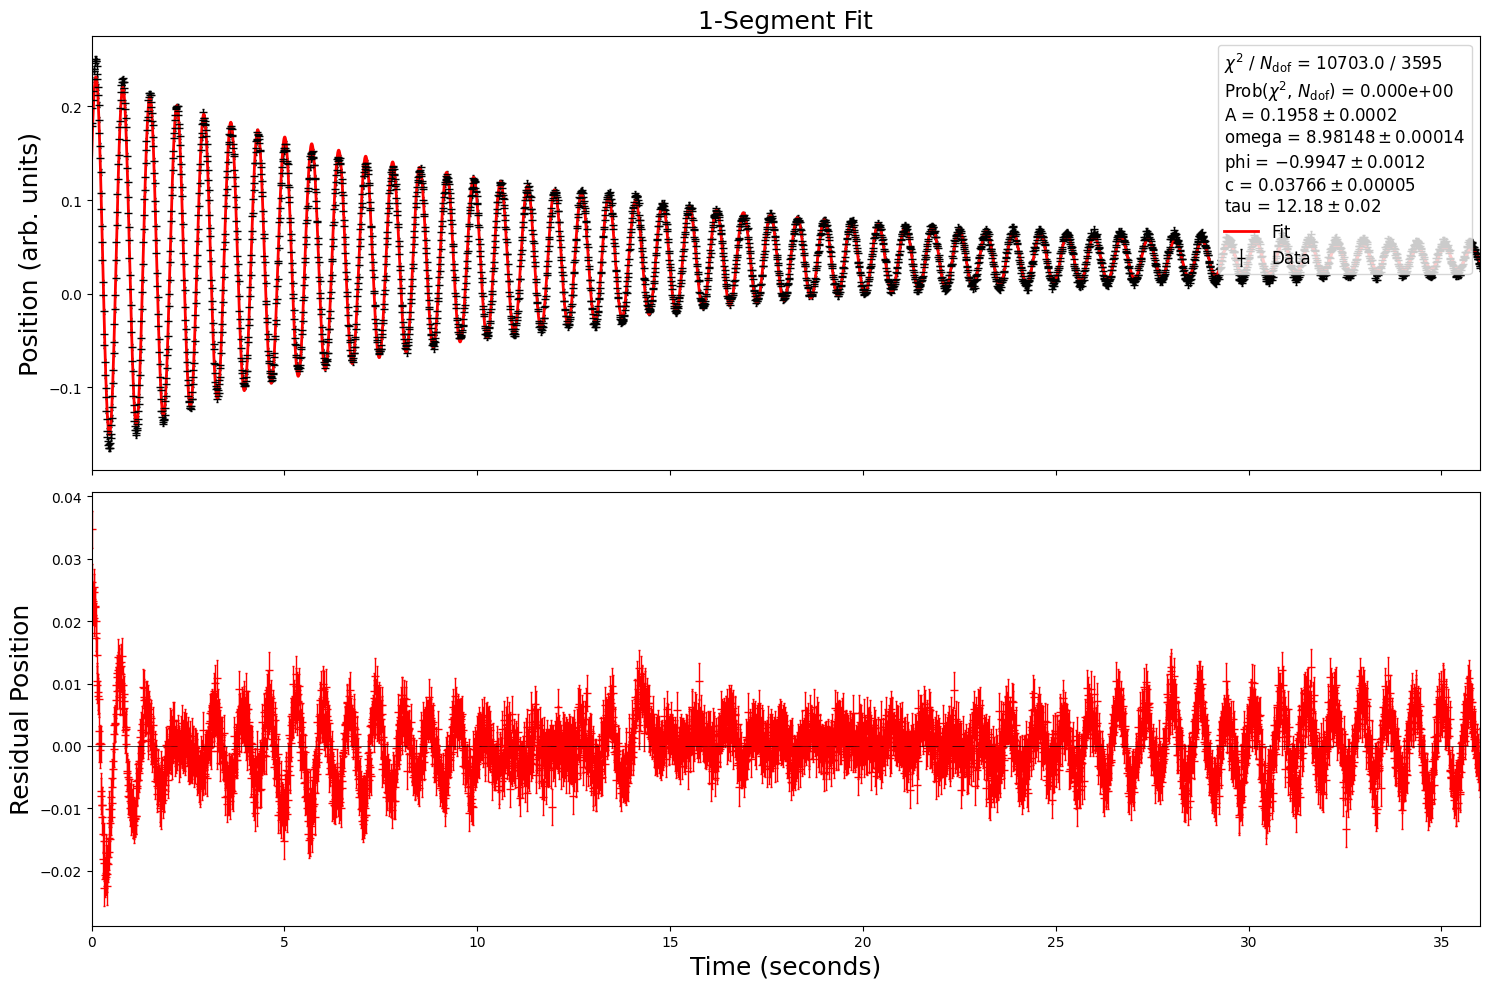

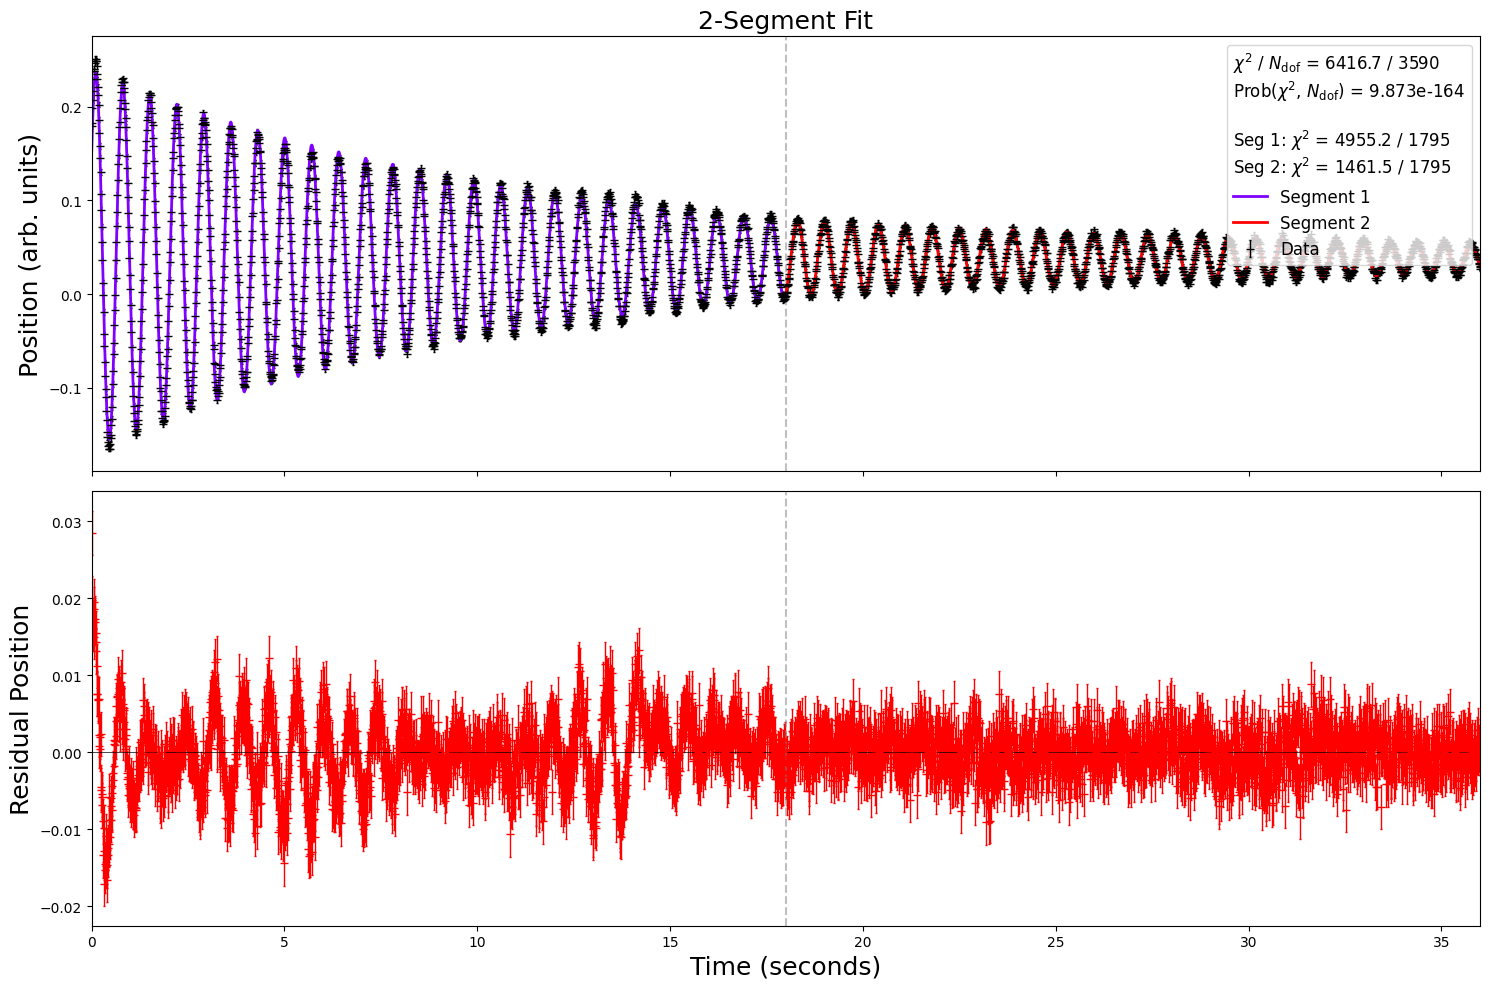

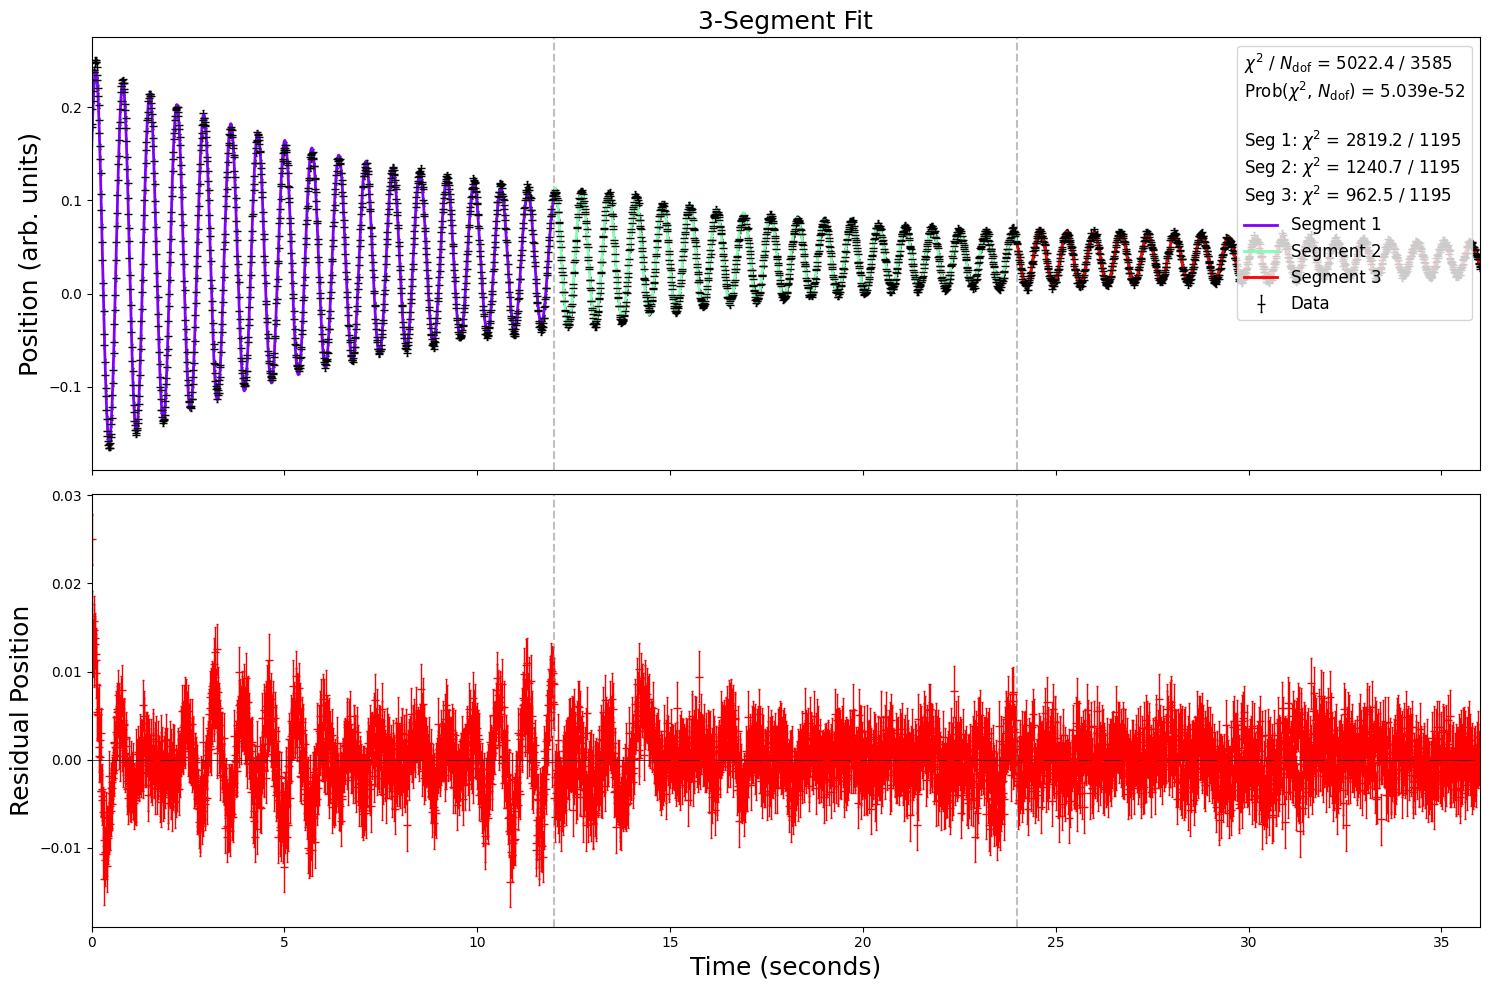

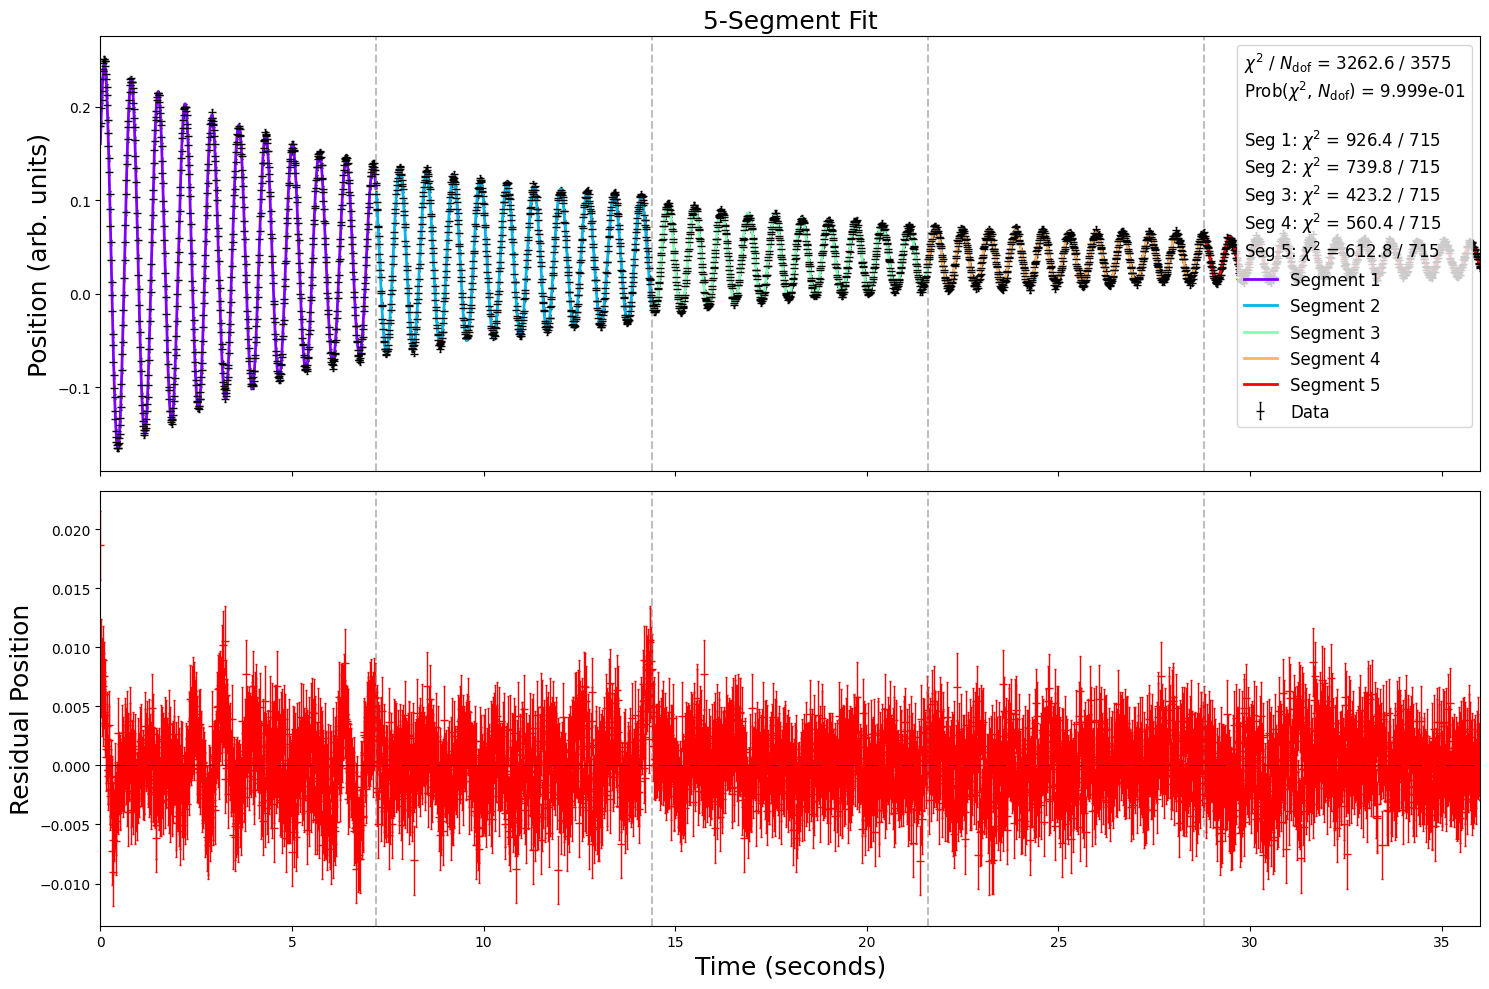

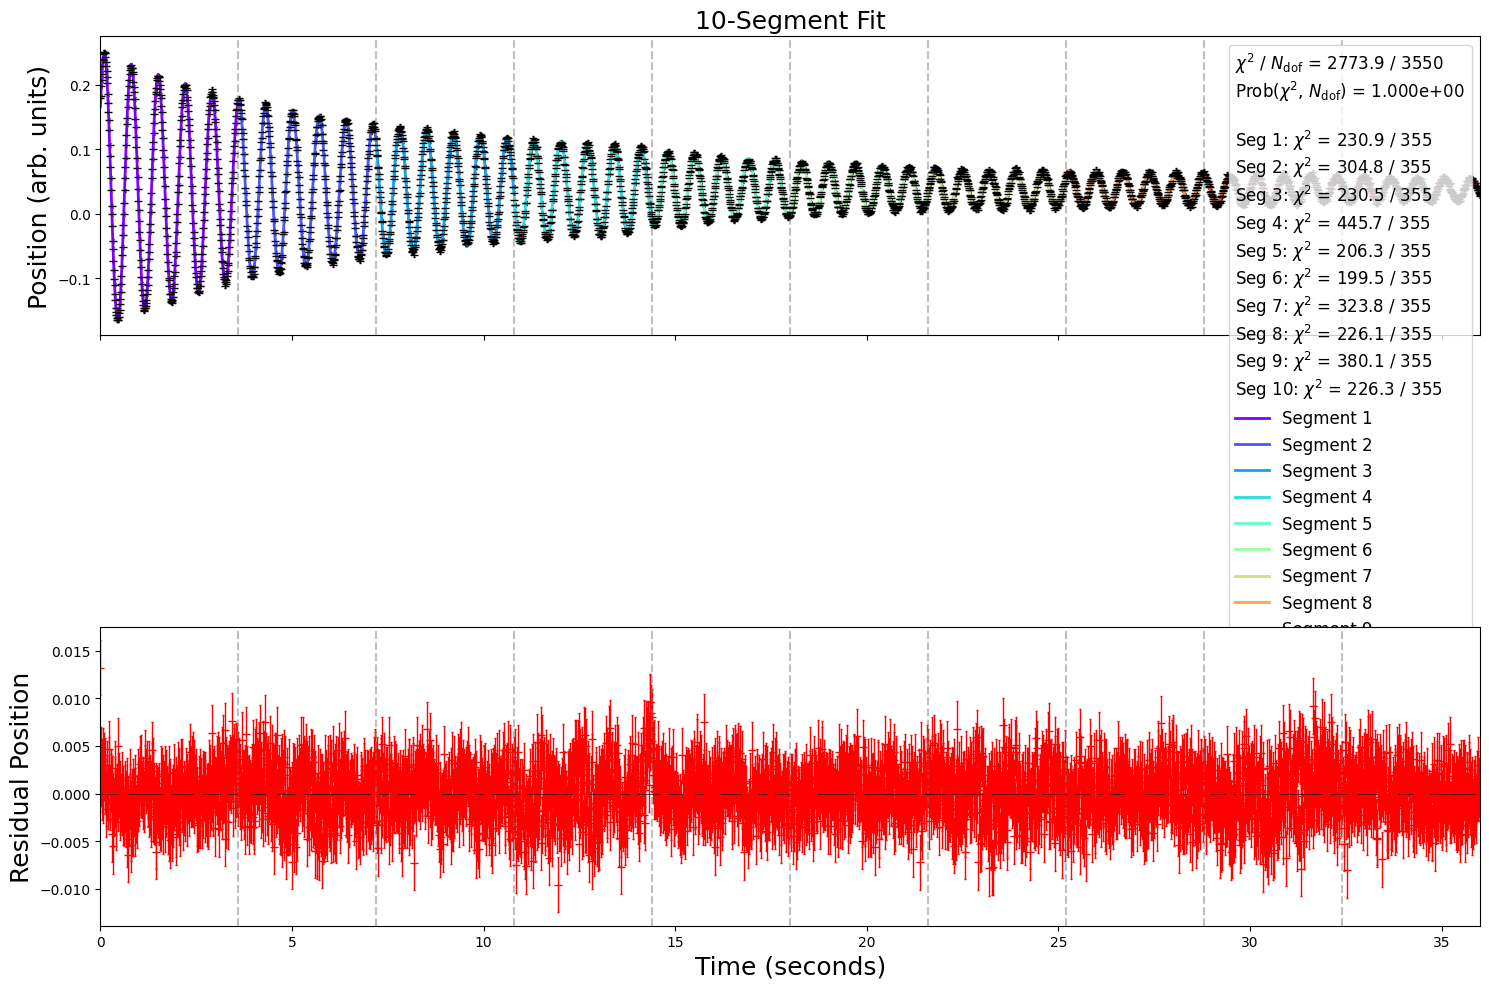


SEGMENT COMPARISON TABLE
N_segments   χ²           ndof     χ²/ndof      p-value     
--------------------------------------------------------------------------------
1               10703.0    3595       2.977  0.0000e+00
2                6416.7    3590       1.787  9.8730e-164
3                5022.4    3585       1.401  5.0393e-52
5                3262.6    3575       0.913  9.9993e-01
10               2773.9    3550       0.781  1.0000e+00


In [131]:
# Try different numbers of segments and compare
segment_options = [1, 2, 3, 5, 10]  # Different segmentation options
comparison_results = {}

for n_segments in segment_options:
    print(f"\n{'='*60}")
    print(f"Fitting with {n_segments} segment(s)")
    print(f"{'='*60}")
    
    if n_segments == 1:
        # Single fit for the whole range
        tmax = 36.0
        mask = time2 < tmax
        cfit = cost.LeastSquares(time2[mask], position2[mask], eposition2[mask], func_exp_ho)
        mfit = Minuit(cfit, A=0.1958, omega=8.98, phi=-0.99, c=0.038, tau=12.0)
        mfit.migrad()
        
        chi2_total = mfit.fval
        ndof_total = len(time2[mask]) - len(mfit.values[:])
        prob_total = stats.chi2.sf(chi2_total, ndof_total)
        
        # Store results
        comparison_results[n_segments] = {
            'chi2': chi2_total,
            'ndof': ndof_total,
            'prob': prob_total,
            'fits': [(0, 36.0, mask, mfit)]
        }
        
    else:
        # Multiple segments
        t_segments = np.linspace(0, 36.0, n_segments + 1)
        fits = []
        chi2_segments = []
        
        for i in range(n_segments):
            t_min = t_segments[i]
            t_max = t_segments[i + 1]
            mask_seg = (time2 >= t_min) & (time2 < t_max)
            
            if np.sum(mask_seg) < 10:
                continue
            
            cfit_seg = cost.LeastSquares(time2[mask_seg], position2[mask_seg], eposition2[mask_seg], func_exp_ho)
            mfit_seg = Minuit(cfit_seg, A=0.15, omega=8.98, phi=-0.99, c=0.038, tau=12.0)
            mfit_seg.migrad()
            
            chi2_seg = mfit_seg.fval
            ndof_seg = len(time2[mask_seg]) - len(mfit_seg.values[:])
            
            fits.append((t_min, t_max, mask_seg, mfit_seg))
            chi2_segments.append(chi2_seg)
            
            print(f"  Segment {i+1}: t=[{t_min:.1f}, {t_max:.1f}], χ² = {chi2_seg:.1f} / {ndof_seg}")
        
        chi2_total = sum(chi2_segments)
        ndof_total = sum(np.sum(f[2]) for f in fits) - len(fits) * len(mfit_seg.values[:])
        prob_total = stats.chi2.sf(chi2_total, ndof_total)
        
        comparison_results[n_segments] = {
            'chi2': chi2_total,
            'ndof': ndof_total,
            'prob': prob_total,
            'fits': fits
        }
    
    print(f"Total: χ²/ndof = {chi2_total:.1f}/{ndof_total} = {chi2_total/ndof_total:.3f}")
    print(f"p-value = {prob_total:.4e}")

# Now plot each option with residuals
for n_segments, results in comparison_results.items():
    chi2 = results['chi2']
    ndof = results['ndof']
    prob = results['prob']
    fits = results['fits']
    
    # Create figure with two subplots (data+fit and residuals)
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    fig.subplots_adjust(hspace=0)
    
    # Main plot with fit on top
    axs[0].errorbar(time2, position2, eposition2, fmt='k_', label='Data', 
                    ecolor='k', elinewidth=1, capsize=1, capthick=1)
    axs[0].set_ylabel("Position (arb. units)", fontsize=18)
    axs[0].set_xlim(time2[0], 36.0)
    
    # Plot fits and calculate residuals
    colors = plt.cm.rainbow(np.linspace(0, 1, len(fits)))
    res_position = np.zeros_like(position2)
    
    for idx, (t_min, t_max, mask_seg, mfit_seg) in enumerate(fits):
        x_seg = time2[mask_seg]
        y_seg = func_exp_ho(x_seg, *mfit_seg.values[:])
        
        if n_segments == 1:
            label = 'Fit'
            color = 'r'
        else:
            label = f'Segment {idx+1}'
            color = colors[idx]
        
        axs[0].plot(x_seg, y_seg, color=color, linewidth=2.0, label=label)
        
        # Mark segment boundaries
        if idx < len(fits) - 1 and n_segments > 1:
            axs[0].axvline(t_max, color='gray', linestyle='--', alpha=0.5)
        
        # Calculate residuals for this segment
        res_position[mask_seg] = position2[mask_seg] - func_exp_ho(time2[mask_seg], *mfit_seg.values[:])
    
    # Put fit info into plot
    fit_info = [
        f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {ndof}",
        f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob:.3e}",
    ]
    
    # Add individual segment chi-squares if multiple segments
    if n_segments > 1:
        fit_info.append("")
        for idx, (t_min, t_max, mask_seg, mfit_seg) in enumerate(fits):
            chi2_seg = mfit_seg.fval
            ndof_seg = np.sum(mask_seg) - len(mfit_seg.values[:])
            fit_info.append(f"Seg {idx+1}: $\\chi^2$ = {chi2_seg:.1f} / {ndof_seg}")
    else:
        # Add parameter values for single fit
        mfit_display = fits[0][3]
        for p, v, e in zip(mfit_display.parameters, mfit_display.values[:], mfit_display.errors[:]):
            Ndecimals = max(0, -np.int32(np.log10(e)-1-np.log10(2)))
            fit_info.append(f"{p} = ${v:{10}.{Ndecimals}{'f'}} \\pm {e:{10}.{Ndecimals}{'f'}}$")
    
    axs[0].legend(title="\n".join(fit_info), fontsize=12, title_fontsize=12, 
                  alignment='left', loc='upper right')
    axs[0].set_title(f"{n_segments}-Segment Fit", fontsize=18)
    
    # Residual plot
    axs[1].errorbar(time2, res_position, eposition2, fmt='r_', label='Residuals', 
                    ecolor='r', elinewidth=1, capsize=1, capthick=1)
    axs[1].axhline(0, color='black', linestyle='-', linewidth=0.5)
    axs[1].set_xlabel("Time (seconds)", fontsize=18)
    axs[1].set_ylabel("Residual Position", fontsize=18)
    
    # Mark segment boundaries in residuals too
    if n_segments > 1:
        for idx, (t_min, t_max, _, _) in enumerate(fits[:-1]):
            axs[1].axvline(t_max, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    
    if SavePlots:
        fig.savefig(f"Fit_HarmOsc2_{n_segments}segments.pdf", dpi=600)
    
    plt.show()

# Print comparison table
print("\n" + "="*80)
print("SEGMENT COMPARISON TABLE")
print("="*80)
print(f"{'N_segments':<12} {'χ²':<12} {'ndof':<8} {'χ²/ndof':<12} {'p-value':<12}")
print("-"*80)

for n_seg in segment_options:
    if n_seg in comparison_results:
        res = comparison_results[n_seg]
        chi2_ndof = res['chi2'] / res['ndof']
        print(f"{n_seg:<12} {res['chi2']:>10.1f}  {res['ndof']:>6}  {chi2_ndof:>10.3f}  {res['prob']:>10.4e}")

print("="*80)

## Questions to 2nd dataset:

Again, make a simple harmonic oscillator fit run. Now your job is to expand on the fitting function
and introduce terms to include various effects and thus reduce the Chi2. Set your fit to the range [0.0,36.0], and see how low a Chi2 you can get.

Also, can you see a change in the oscillation behaviour at some point? There seems to be a point at which something changes (damping goes from turbulent to regular?). Does your result improve, if you divide your fit into two parts around there? Three? Twenty?


----

## 3rd Dataset

This set corresponds to a set up in which the oscillator is __slowed__ by sliding constantly along a metal plate.

In [42]:
filename = "data_HarmOsc3.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time3, position3 = np.loadtxt(filename, unpack=True)
time3 -= time3[0]
eposition3 = np.ones_like(position3)*0.0139        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time3[i], position3[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time3), time3[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time3 < -0.001) | (time3 > 100.0) | (position3 < -5.0) | (position3 > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time3[i], position3[i])

  Time =  0.000    Position =  0.614 
  Time =  0.001    Position =  0.606 
  Time =  0.002    Position =  0.600 
  Time =  0.003    Position =  0.596 
  Time =  0.004    Position =  0.579 
  Time =  0.005    Position =  0.568 
  Time =  0.006    Position =  0.560 
  Time =  0.007    Position =  0.561 
  Time =  0.008    Position =  0.545 
  Time =  0.009    Position =  0.539 
  Number of entries read: 13700    Time of last read: 13.699


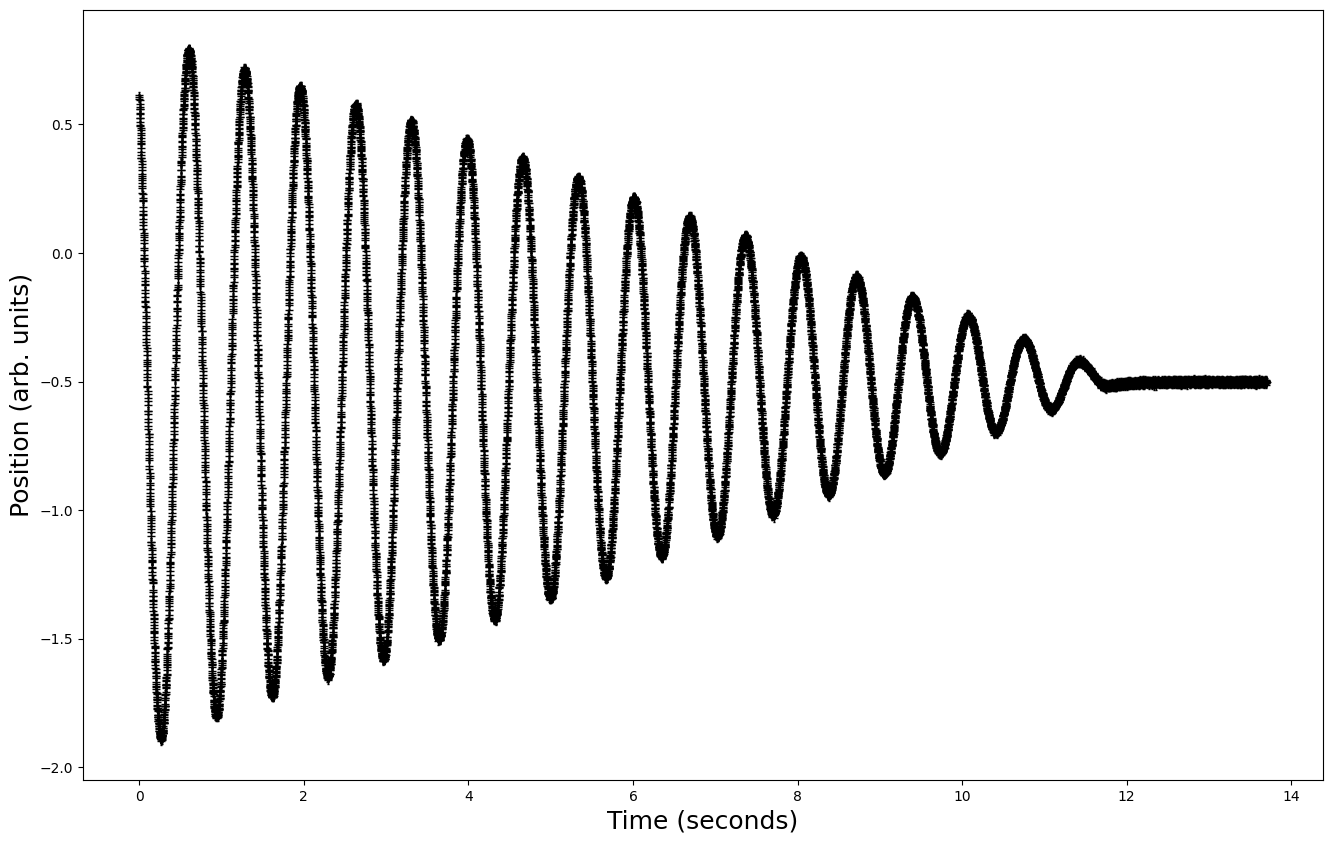

In [43]:
# Plot the data:
fig3, ax3 = plt.subplots(figsize=(16, 10))
ax3.errorbar(time3, position3, eposition3, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax3.set_xlabel("Time (seconds)", fontsize=18)
ax3.set_ylabel("Position (arb. units)", fontsize=18)
fig3.tight_layout;

## Questions to 3rd dataset:

The 3rd dataset exhibits a different type of damping in the oscillation. Fit this, and determine at which point in time the oscillation stops.

#### Notes on possible additions to the damped harmonic oscillator fit function:

In [44]:
# Possible additions to especially the 2nd dataset could be:
#    def fit2(x,p0,p1,p2,p3,p4,p5,p6,p7) :           return p0 + p1 *  np.exp(-p2*x)                    * np.cos(p3+p4*x)         * (1.0 + p5*np.cos(p6*x+p7))
#    def fit3(x,p0,p1,p2,p3,p4,p5,p6,p7,p8) :        return p0 + p1 *  np.exp(-p2*x)                    * np.cos(p3+p4*x+p8*x**2) * (1.0 + p5*np.cos(p6*x+p7))
#    def fit4(x,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10) : return p0 + p1 * (np.exp(-p2*x)+p9*np.exp(-p10*x)) * np.cos(p3+p4*x+p8*x**2) * (1.0 + p5*np.cos(p6*x+p7))

# Learning points:

As stated, this is an exercise in starting with a simple fit and building a more advanced one.

Following this exercise, you should have experience in:
1. The idea of building a more and more advanced fit by adding fit terms/parameters.
2. The usefulness of the fit residuals to
  - determine the effect of an added fit term/parameter.
  - guide you in realising what the next effect to model in the fit is.
3. Knowing how to judge the significance of an added term/parameter.

To some extend, the exercise resembles (data) science in general: You look at the data, and try out a simple model. If it fails, then you try something different, and now you can compare the two. And then you add more details to the models that seem to work, and then you might reach the point, where the model actually describes the data in "enough" detail, that you are satisfied.

You may take the task/process far, which is a great exercise. However, before you remember the wise words of George Box:
_"All models are flawed, but some are useful"._